<a href="https://colab.research.google.com/github/wldbsdk/2025-1--myclass-BDA/blob/main/inclass/05w_B_wed_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05주차 수업

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})

df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [6]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [8]:
id(df_new) == id(df_raw)


False

In [9]:
df_new.rename(columns = {'var2 ': 'v2'})

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [10]:
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [11]:
df_new.rename(columns = {'var2 ': 'v2'}, inplace = True)
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [12]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [15]:
df_new.rename(index = {0 : 'x', 1: 'y', 2: 'z'}, inplace = True)
df_new

,var1,var2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [17]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.rename(columns={"A":"a", "B":"c"})

,a,c
0,1,4
1,2,5
2,3,6


In [18]:
df

,A,B
0,1,4
1,2,5
2,3,6


## 파생 변수 생성

In [19]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2': [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [21]:
df1 =df.copy()

In [23]:
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df1['var1'] + df1['var2']

,0
0,6
1,9
2,9


In [25]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [26]:
df1['var_sum'] = df1['var1'] + df1['var2'] / 2
df1

,var1,var2,var_sum
0,4,2,5.0
1,3,6,6.0
2,8,1,8.5


In [27]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [28]:
df2.sum()

,0
var1,15
var2,9


In [29]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [30]:
df2['var_sum'] = df2.sum(axis=1)
df2

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [31]:
df2['var_sum'] = df2.sum(axis='columns')
df2

,var1,var2,var_sum
0,4,2,12
1,3,6,18
2,8,1,18


In [32]:
df2[['var1', 'var2']]

,var1,var2
0,4,2
1,3,6
2,8,1


In [33]:
df2[['var1', 'var2']].mean()

,0
var1,5.0
var2,3.0


In [34]:
df2[['var1', 'var2']].mean(axis=1)

,0
0,3.0
1,4.5
2,4.5


In [35]:
df2['var_mean'] = df2[['var1', 'var2']].mean(axis=1)
df2

,var1,var2,var_sum,var_mean
0,4,2,12,3.0
1,3,6,18,4.5
2,8,1,18,4.5


In [36]:
df1

,var1,var2,var_sum
0,4,2,5.0
1,3,6,6.0
2,8,1,8.5


## mpg 연비 변수 생성

In [42]:
! git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.53 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [43]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [44]:
mpg.sample(8)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
181,toyota,camry,2.4,2008,4,manual(m5),f,21,31,r,midsize
214,volkswagen,jetta,2.0,1999,4,auto(l4),f,19,26,r,compact
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact


In [47]:
mpg.total = (mpg.cty + mpg.hwy) / 2
mpg.head()

<ipython-input-47-0e68e0222155>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cty + mpg.hwy) / 2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [48]:
mpg['total'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [50]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [51]:
sum(mpg.total) / len(mpg)

20.14957264957265

In [52]:
mpg.total.mean()

np.float64(20.14957264957265)

In [53]:
mpg['total'].mean()

np.float64(20.14957264957265)

## 조건문 활용

In [56]:
mpg.total.describe()

,0
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


<Axes: ylabel='Frequency'>

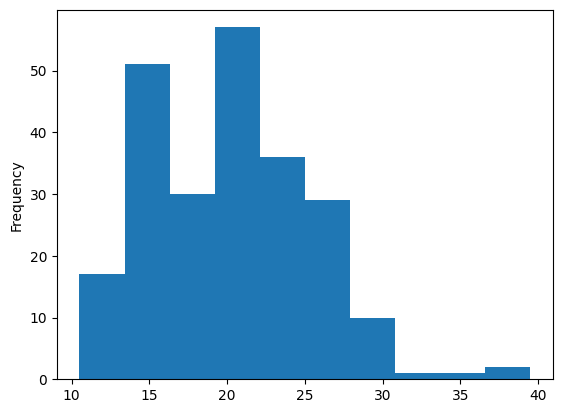

In [57]:
mpg.total.plot.hist()

In [61]:
! pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.5 MB/s eta 0:00:00


In [63]:
import koreanize_matplotlib

<Axes: title={'center': '히스토그램'}, ylabel='Frequency'>

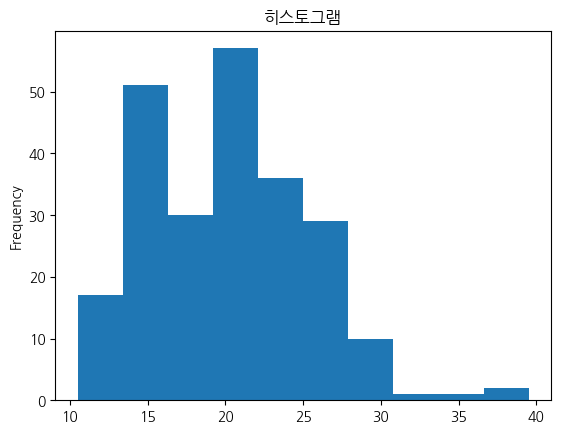

In [64]:
mpg['total'].plot(kind="hist", title="히스토그램")

<Axes: xlabel='total', ylabel='Count'>

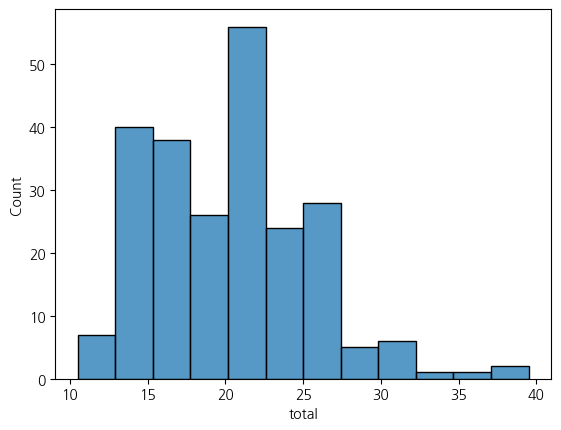

In [65]:
import seaborn as sns
sns.histplot(mpg, x='total')